In [39]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
data = pd.read_excel("cancer patient data sets.xlsx")
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


The Level is the one to be predicted (Low, Medium, High)

Text(0.5, 1.0, 'Age vs Level of cancer')

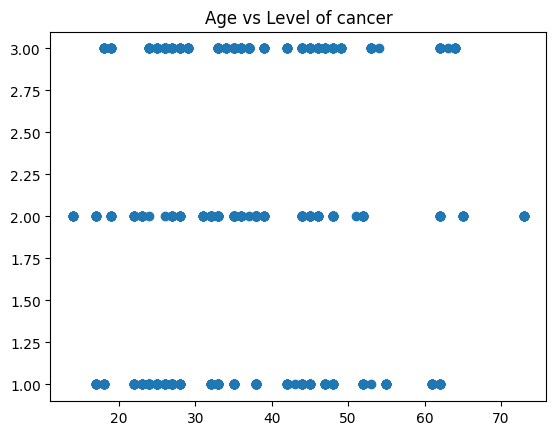

In [9]:
plt.scatter(data['Age'], data['Level'])
plt.title('Age vs Level of cancer')

if you could observe this data is almost independent of age

<Axes: >

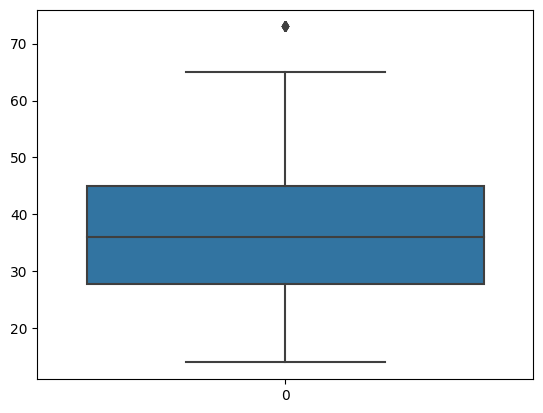

In [10]:
sns.boxplot(data['Age'])

This proves that cancer is predominant in people in age limit of 30-50

In [16]:
data['Gender'].unique()

array([1, 2], dtype=int64)

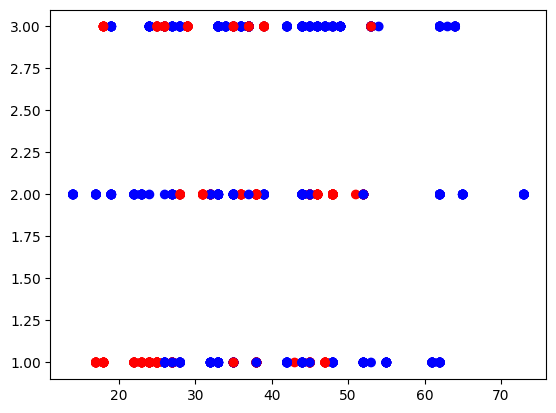

In [18]:
colors = ['blue' if g == 1 else 'red' for g in data['Gender']]
plt.scatter(data['Age'], data['Level'], c = colors)

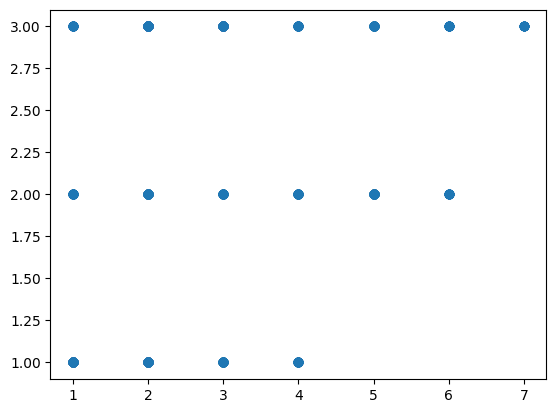

In [19]:
plt.scatter(data['Snoring'], data['Level'])

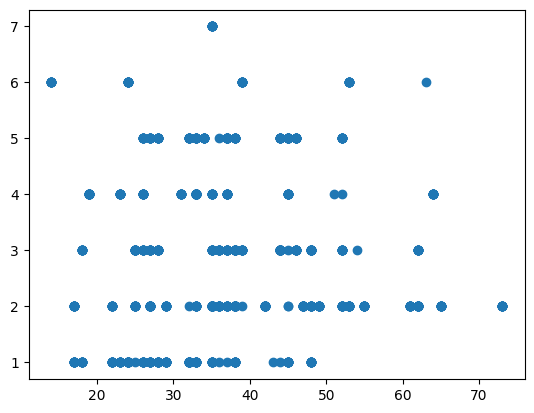

In [20]:
plt.scatter(data['Age'], data['Snoring'])

In [26]:
data = data.drop('Patient Id', axis = 1)

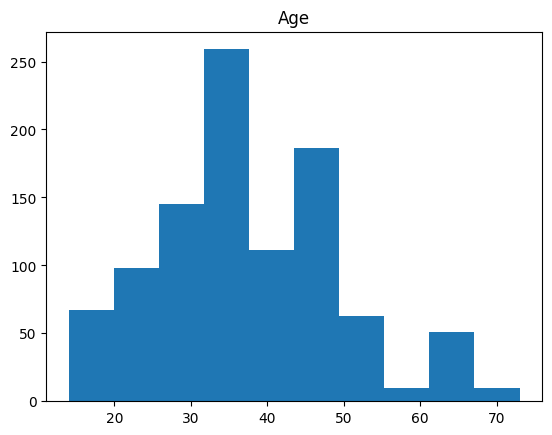

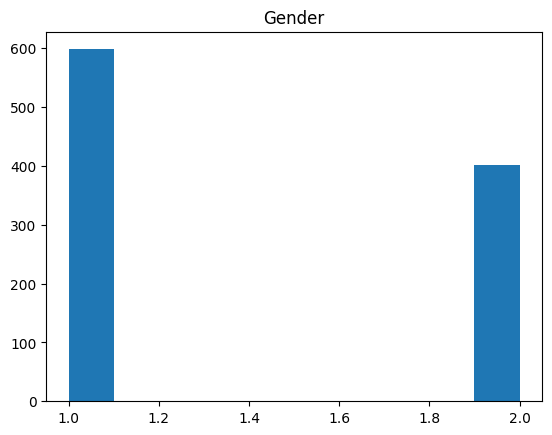

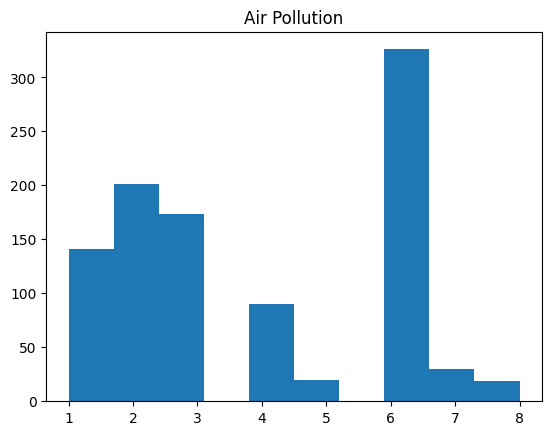

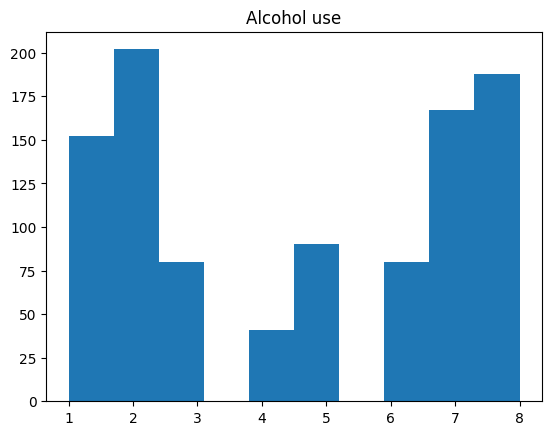

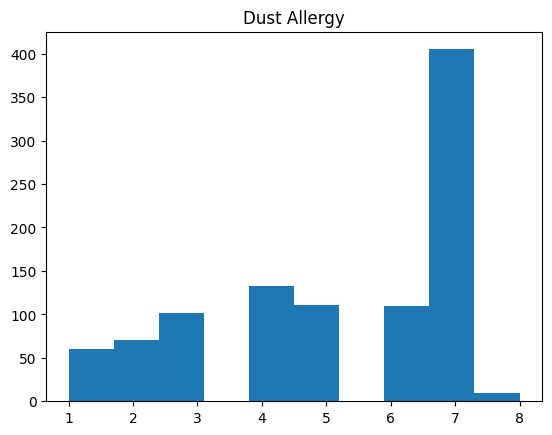

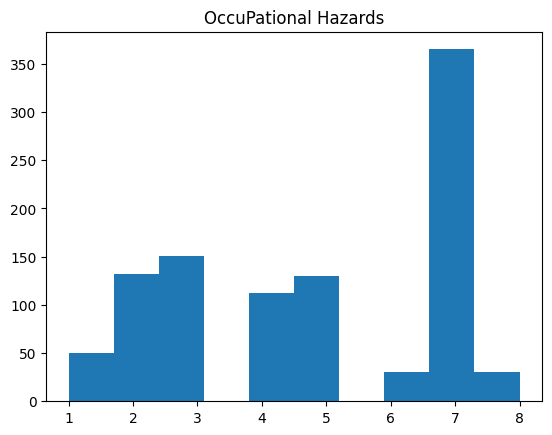

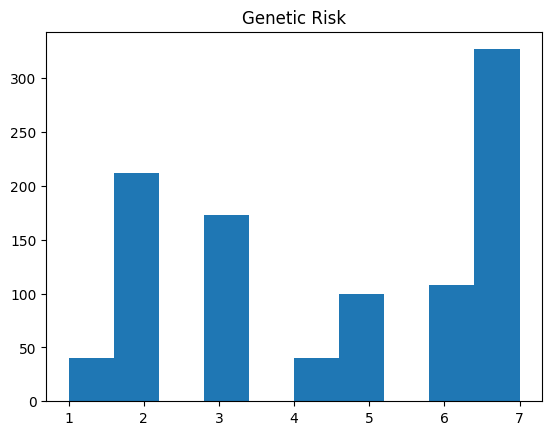

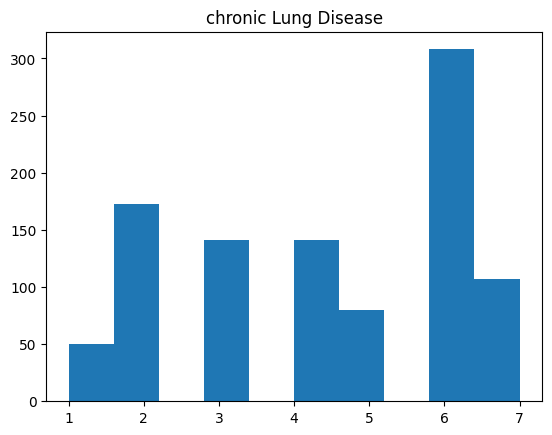

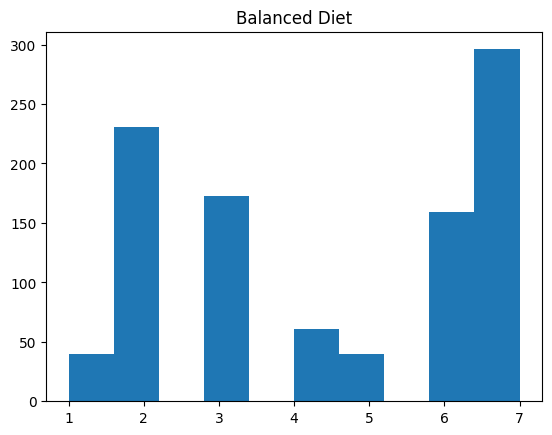

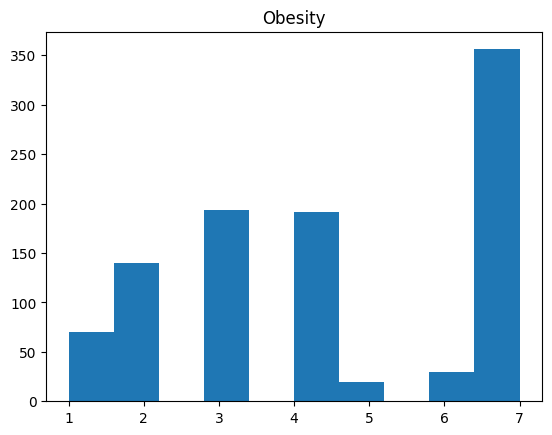

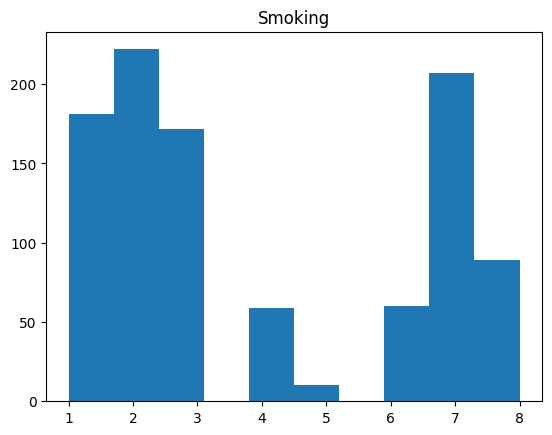

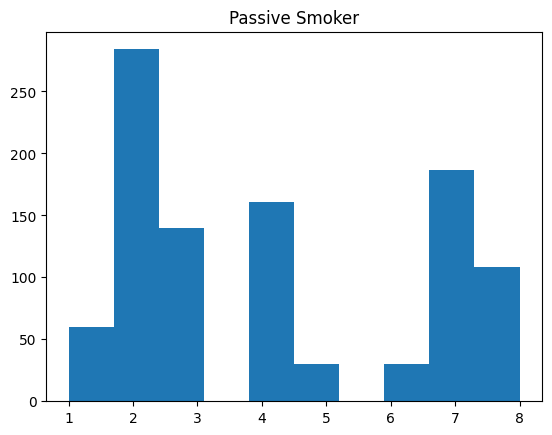

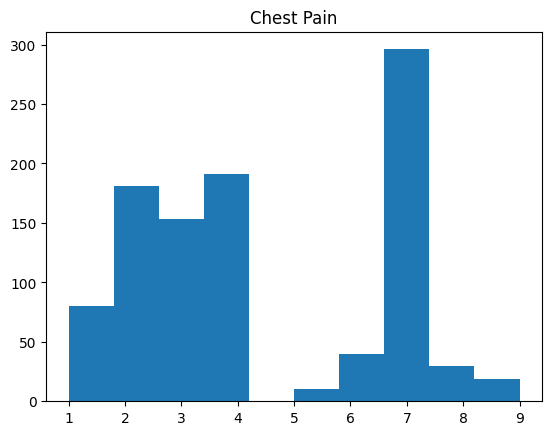

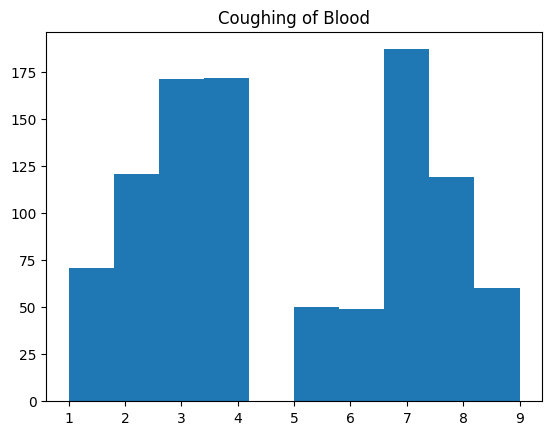

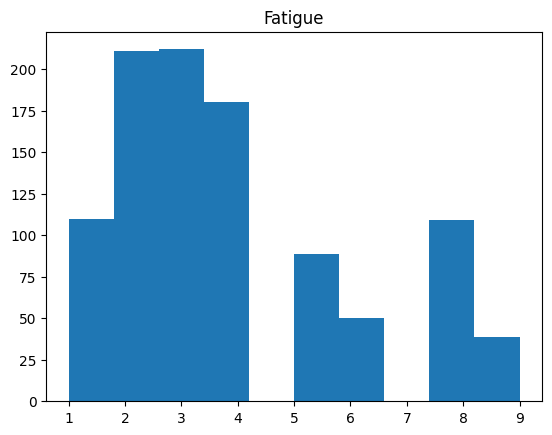

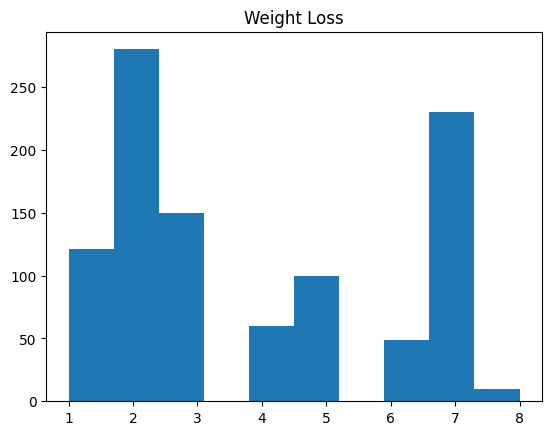

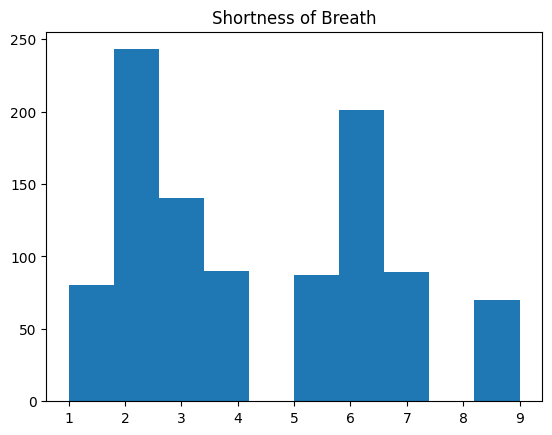

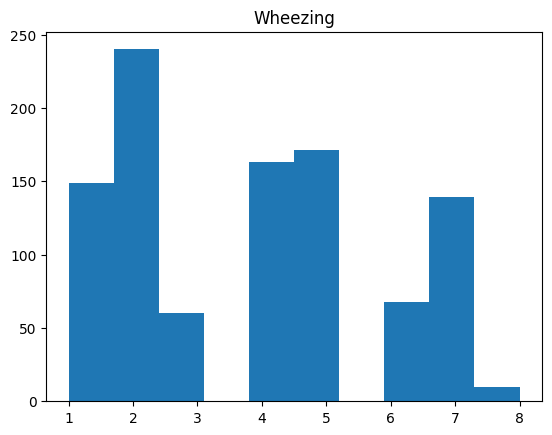

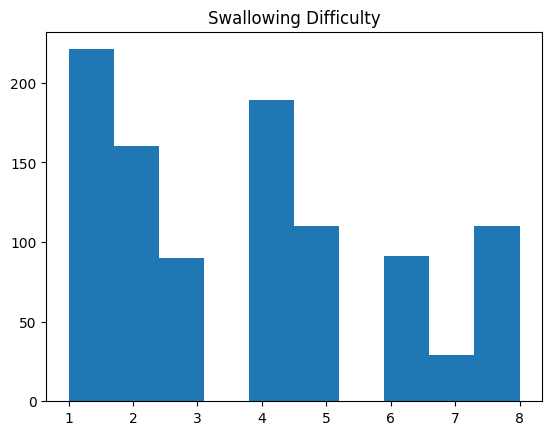

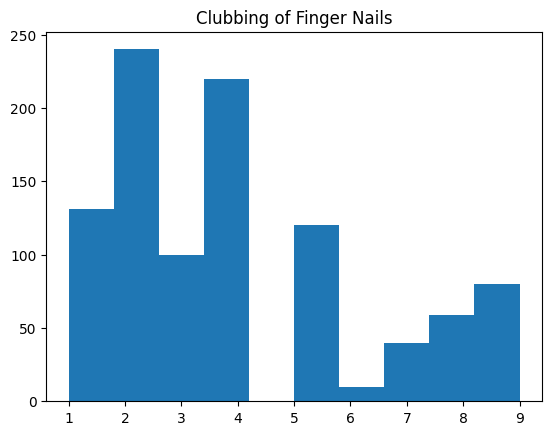

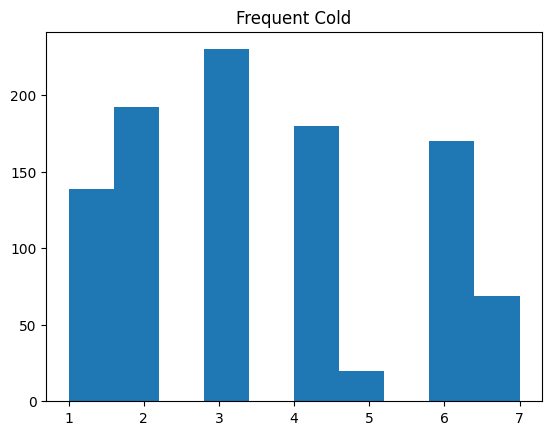

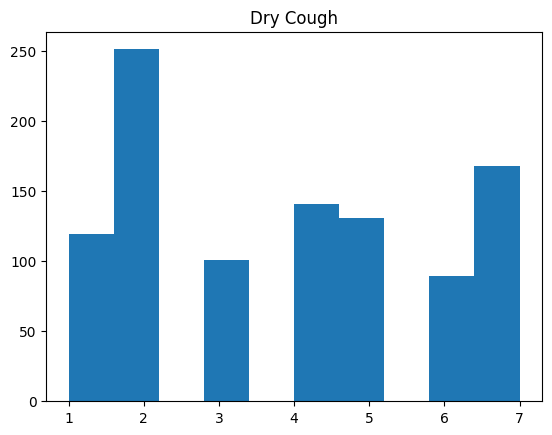

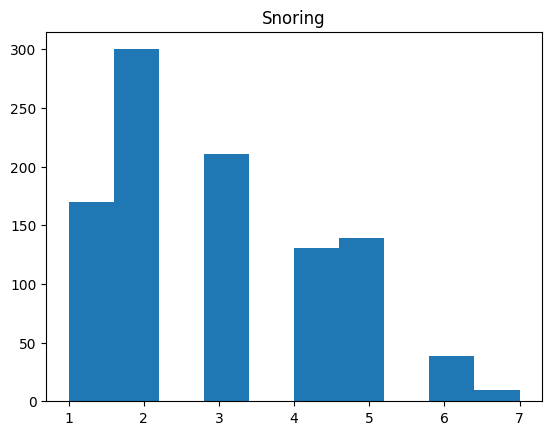

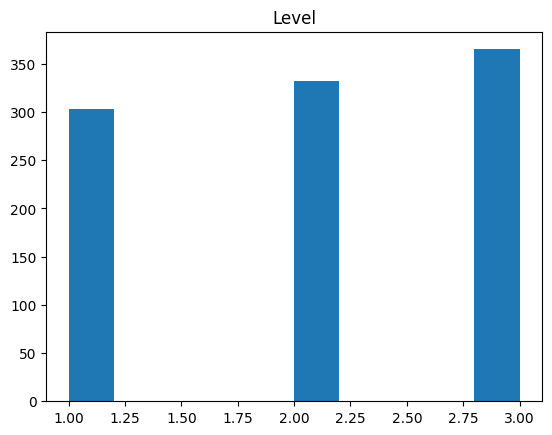

In [38]:
for column in data.columns:
    plt.hist(data[column])
    plt.title(f"{column}")
    plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Separate features (X) and target (y)
X = data.drop(columns = ['Level', 'Patient Id'])  # Assuming 'target_column' is your target variable
y = data['Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize features (optional but often beneficial for some algorithms like KNN or SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target variable (if needed, for example, if it's categorical)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
# Train the model
knn.fit(X_train_scaled, y_train_encoded)
# Predict on test data
y_pred_knn = knn.predict(X_test_scaled)
# Evaluate accuracy
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 1.0


In [71]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train_scaled, y_train_encoded)

# Predict on test data
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate accuracy
accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)


Logistic Regression Accuracy: 1.0


In [70]:
from sklearn.cluster import KMeans

# Instantiate KMeans
kmeans = KMeans(n_clusters=3)

# Fit KMeans to the scaled data
kmeans.fit(X_train_scaled)

# Predict clusters on test data
cluster_labels = kmeans.predict(X_test_scaled)

accuracy_kmeans = accuracy_score(y_test_encoded, cluster_labels)
print("KMeans Accuracy:", accuracy_kmeans)

KMeans Accuracy: 0.14


c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree model
dt.fit(X_train, y_train_encoded)

# Instantiate Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the Random Forest model
rf.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Evaluate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [107]:
dt.predict(X_test)

c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0,
       1, 2])

In [118]:
from sklearn.svm import SVC

# Instantiate SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm.fit(X_train_scaled, y_train_encoded)

# Predict on test data
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 1.0


In [119]:
High_data = data[data['Level'] == 'High']

In [124]:
High_data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
10,P107,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High


{'whiskers': [<matplotlib.lines.Line2D at 0x1fc5b35c150>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc58fbb350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc5b35f910>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc58fb9e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc58fb8a90>],
 'means': []}

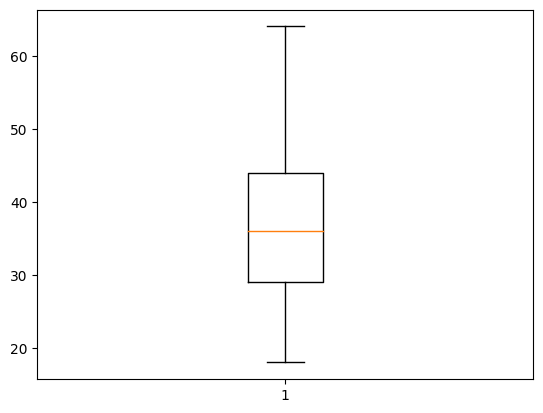

In [126]:
plt.boxplot(High_data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc56441e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc58f5a210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc5b371bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc5b97ce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc57a2c290>],
 'means': []}

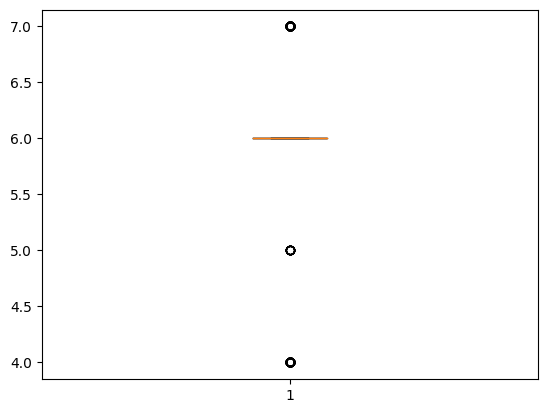

In [125]:
plt.boxplot(High_data['chronic Lung Disease'])

In [130]:
def age_classify(value):
    if value <= 30:
        return 0
    elif value > 30 and value <= 50:
        return 1
    elif value > 50:
        return 2
data['Age'] = data['Age'].apply(age_classify)

In [128]:
High_data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
2,P100,1,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,1,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,1,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,1,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
10,P107,1,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High


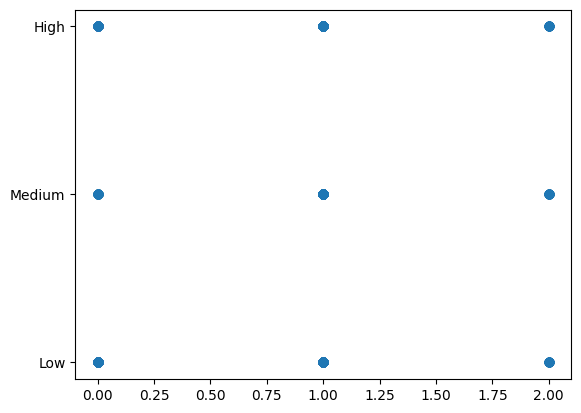

In [133]:
plt.scatter(data['Age'], data['Level'])